In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [24]:
# Load the CSV file
path = "data/COVID_data.csv"
df = pd.read_csv(path)  # Replace with your file path

country_waves = {"Republic of Korea": {1: [15, 123],
                                   2: [206, 288],
                                   3: [289, 419],
                                   4: [533, 652], #좀 애매함
                                   5: [736, 897],
                                   6: [897, 1010],
                                   7: [1010, 1164] #wave가 애매하게 2개임
                                   },
            "China": {1: [0, 74],
                      2: [66, 119],
                      3: [180, 266], #[154, 266]
                      4: [316, 413], #wave가 살짝 2개에 가까움
                      5: [484, 561],
                      6: [1065, 1119],
                      },
            "United Kingdom of Great Britain and Northern Ireland": {1: [52, 184],
                                                                     2: [192, 486], #wave가 2개라서 아래의 3,4번에서 2개로 나눠도 봄.
                                                                     3: [192, 330], #2번의 앞쪽 wave
                                                                     4: [331, 486], #2번의 뒤쪽 wave
                                                                     5: [772, 871],
                                                                     6: [869, 983]
                   }
            }

using_coutries = ["Republic of Korea", "China", "United Kingdom of Great Britain and Northern Ireland"]
kind = 'New_cases' #[New_cases, Cumulative_cases, New_deaths, Cumulative_deaths]

time_data = {"Republic of Korea": {}, "China": {}, "United Kingdom of Great Britain and Northern Ireland": {}}
real_time_data = {"Republic of Korea": {}, "China": {}, "United Kingdom of Great Britain and Northern Ireland": {}}
wave_data = {"Republic of Korea": {}, "China": {}, "United Kingdom of Great Britain and Northern Ireland": {}}

for country in using_coutries:
    country_data = df[df["Country"] == country]
    country_data["Real_date"] = pd.to_datetime(country_data["Date_reported"]) # save the real date for plotting
    country_data["Date_reported"] = pd.to_datetime(country_data["Date_reported"])
    country_data["Date_reported"] = (country_data["Date_reported"] - country_data["Date_reported"].iloc[0]).dt.days
    new_cases = country_data[kind].values
    new_cases[new_cases < 1] = 1

    for wave in country_waves[country]:
        start, end = country_waves[country][wave]
        time_data[country][wave] = country_data["Date_reported"].values[start:end]
        real_time_data[country][wave] = country_data["Real_date"].values[start:end]
        wave_data[country][wave] = new_cases[start:end]

# Define a function to calculate the 7-number moving average
def moving_average(data, window_size=7):
    half_window = window_size // 2
    smoothed = []
    
    for i in range(len(data)):
        # Handle edge cases
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        
        # Calculate the average of the current window
        smoothed.append(np.mean(data[start:end]))
    
    return smoothed

data = {} # smoothed data

for country in wave_data:
    data[country] = {}
    for wave in wave_data[country]:
        data[country][wave] = moving_average(wave_data[country][wave])

C:\Users\Lunosoft\AppData\Local\Temp\ipykernel_19264\572741323.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["Real_date"] = pd.to_datetime(country_data["Date_reported"]) # save the real date for plotting
C:\Users\Lunosoft\AppData\Local\Temp\ipykernel_19264\572741323.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["Date_reported"] = pd.to_datetime(country_data["Date_reported"])
C:\Users\Lunosoft\AppData\Local\Temp\ipykernel_19264\572741323.py:40: SettingWithCopyWarning: 

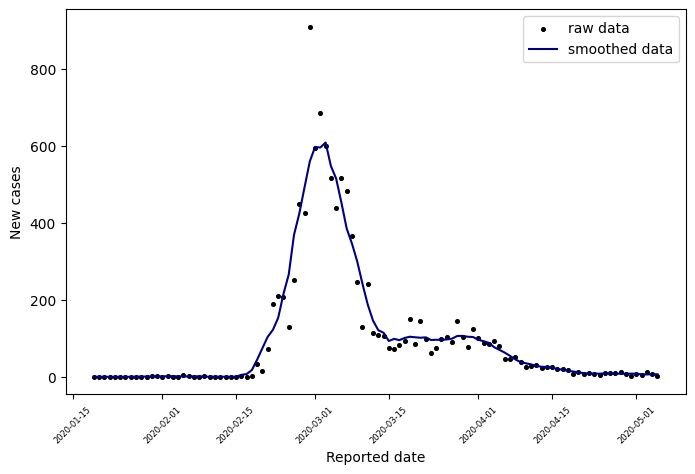

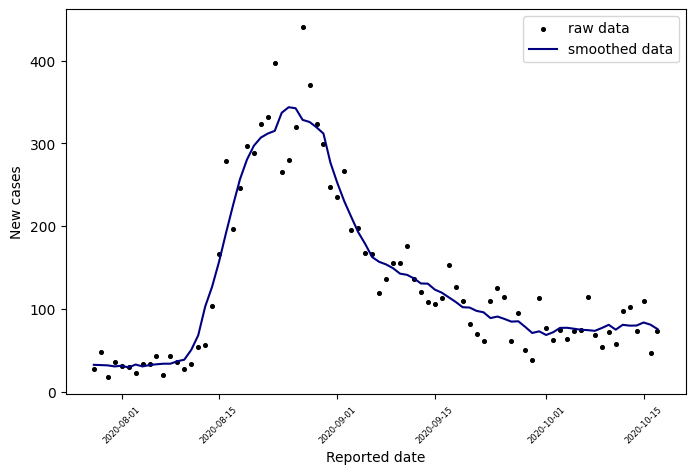

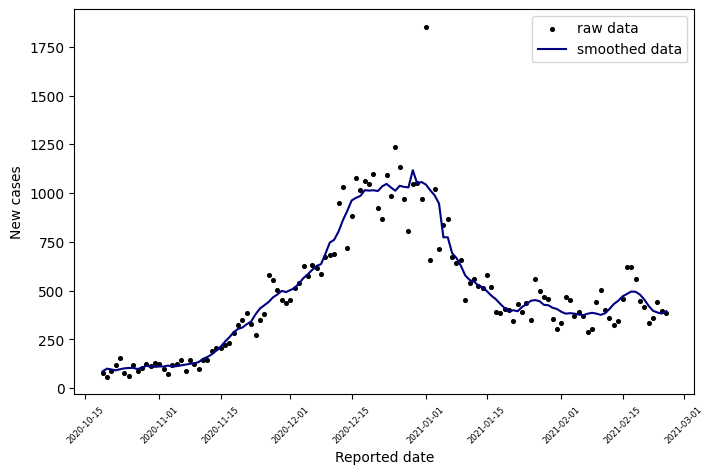

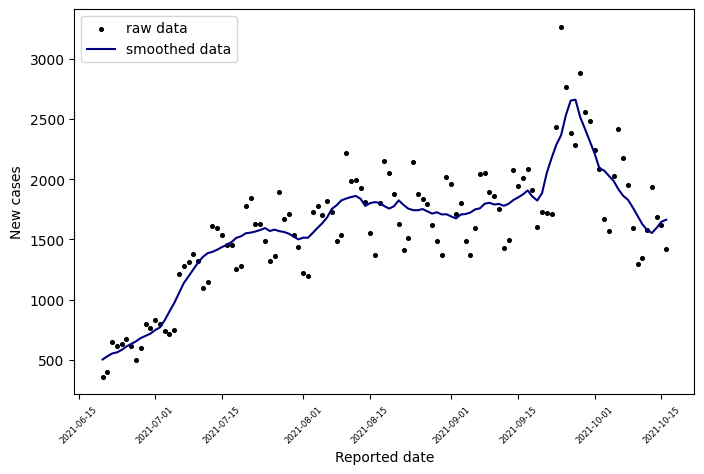

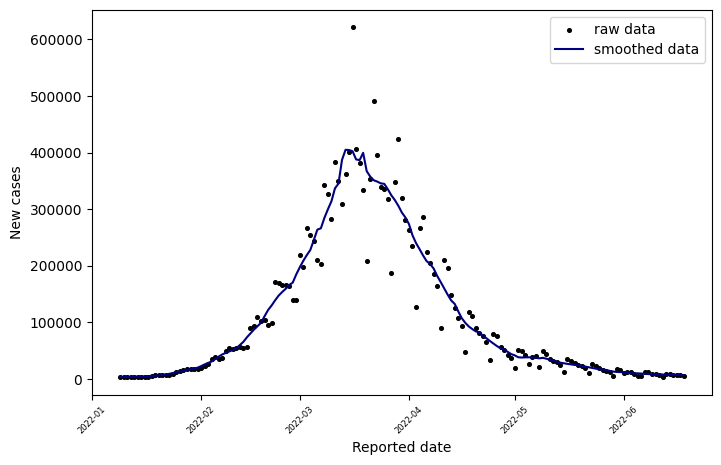

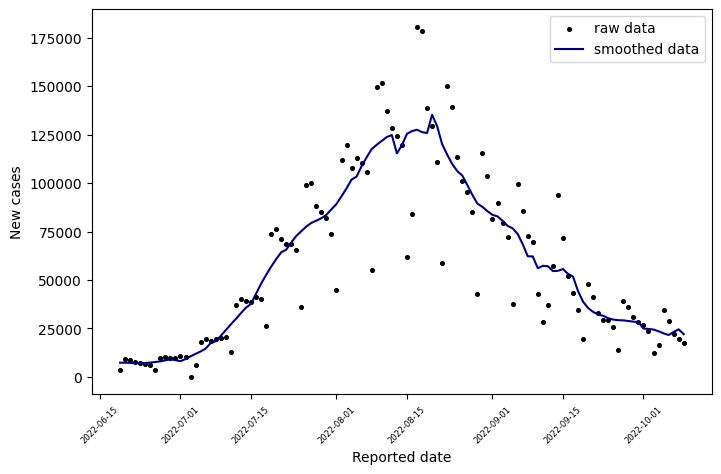

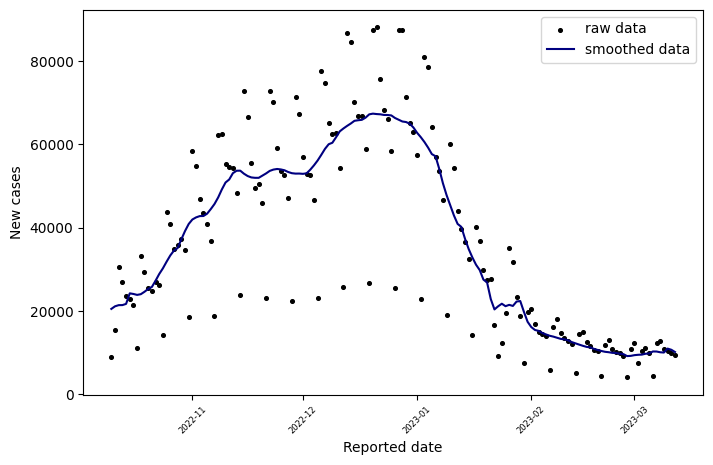

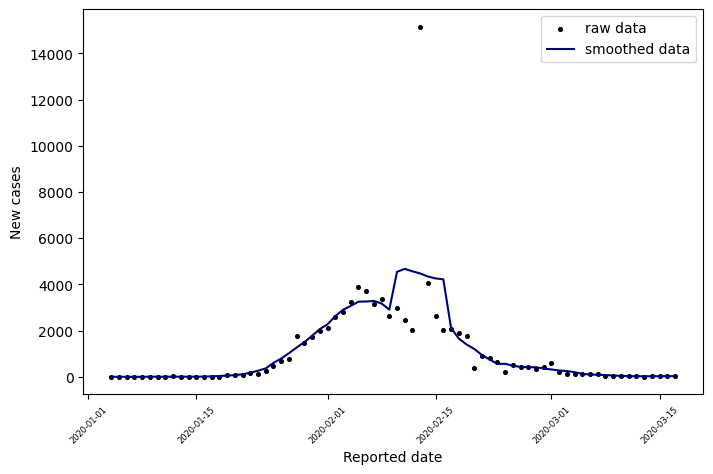

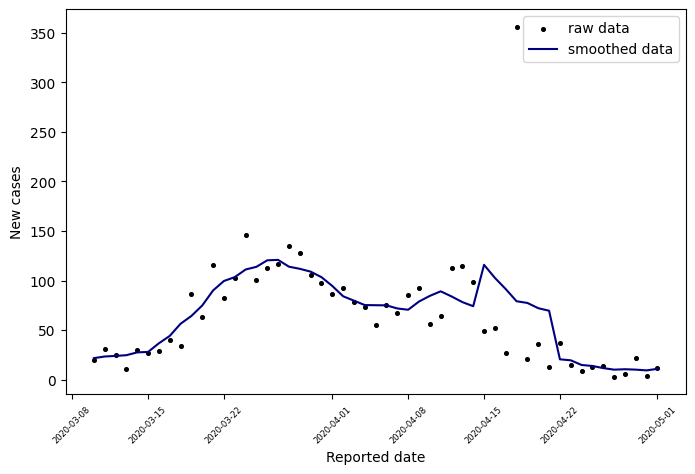

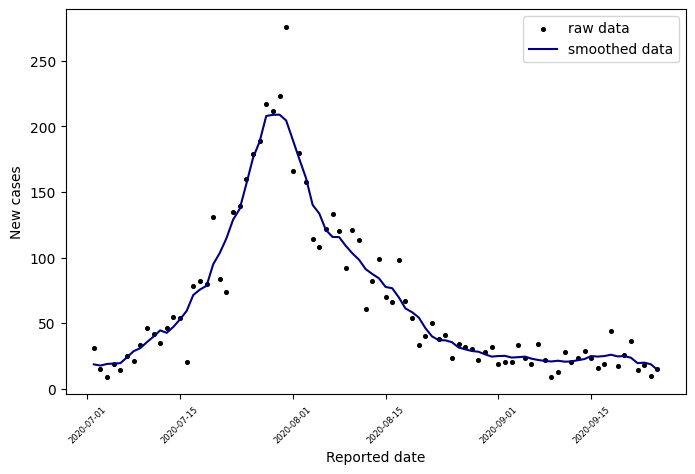

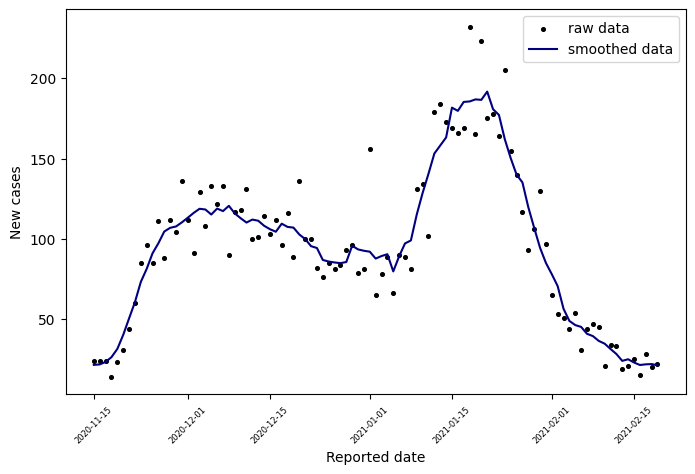

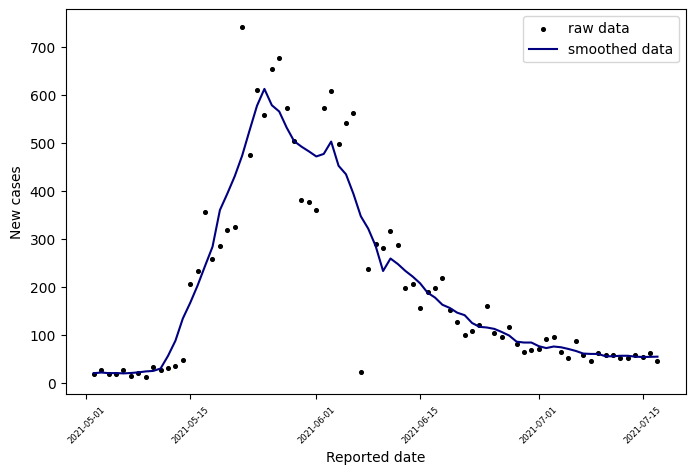

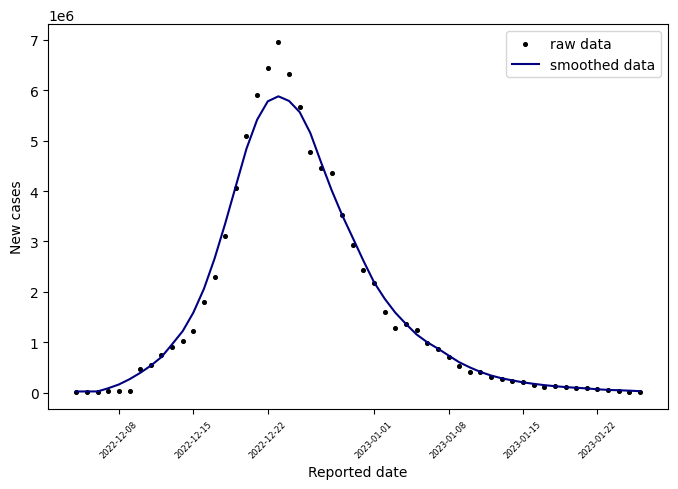

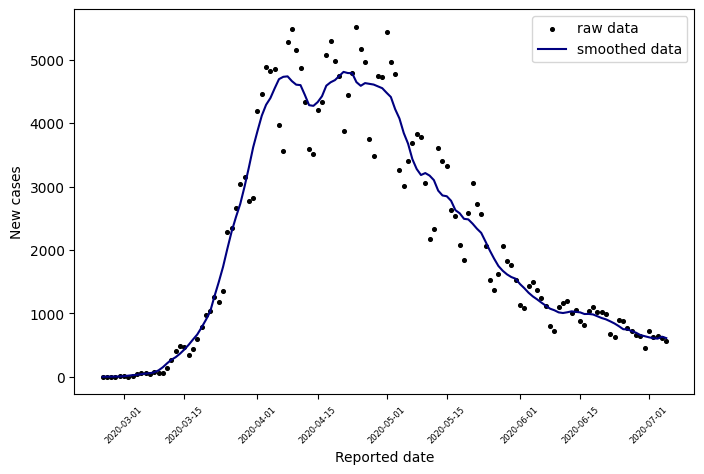

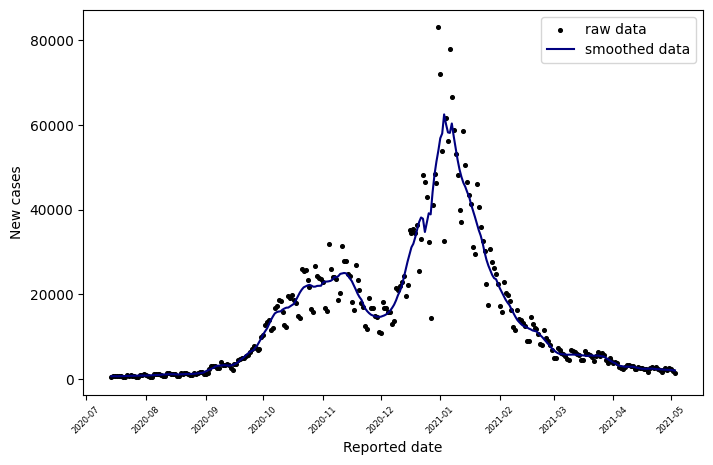

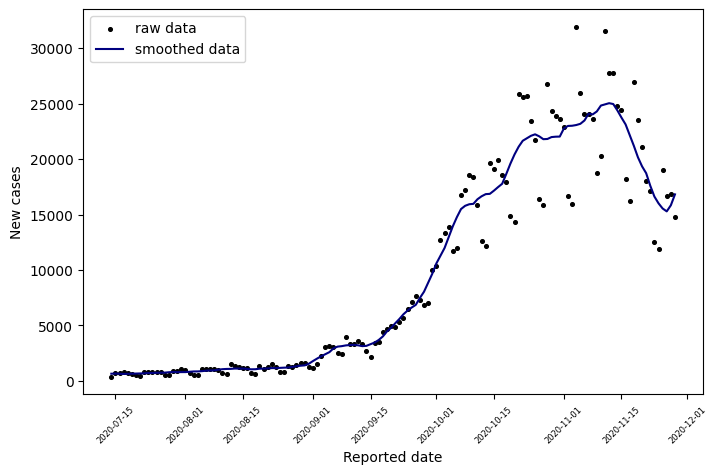

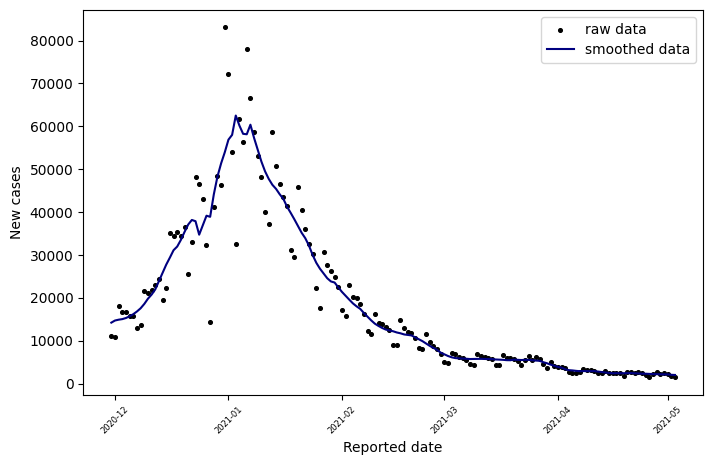

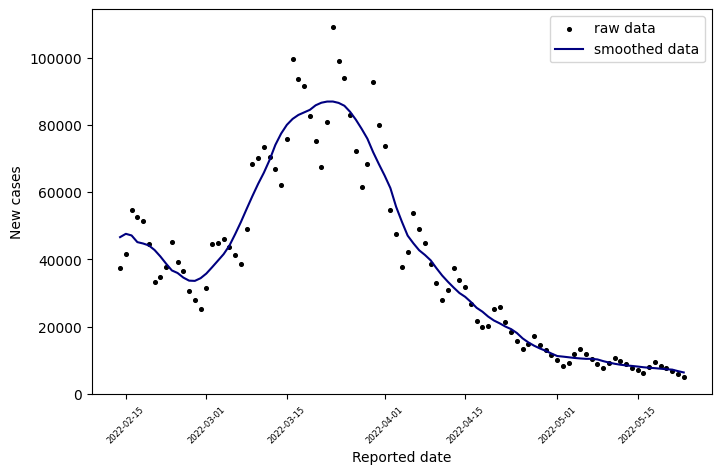

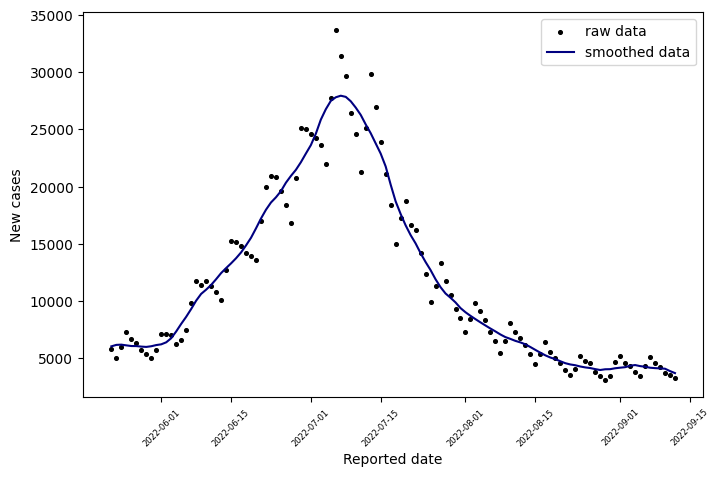

In [33]:
for country in using_coutries:
    for wave in country_waves[country]:
        plt.figure(figsize=(8, 5))
        plt.scatter(real_time_data[country][wave], wave_data[country][wave], label="raw data", color='black', s=7)
        plt.plot(real_time_data[country][wave], data[country][wave], label="smoothed data", color='navy')
        #plt.title(f"{country} Wave {wave} {kind}")
        plt.ylabel('New cases')
        plt.xlabel('Reported date')
        plt.xticks(rotation=45, size=6)
        plt.legend()
        plt.show()